<a href="https://colab.research.google.com/github/amsac/py-libs-for-ml/blob/main/tensorflow/tf_and_Keras_deeplizard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


train_labels = []
train_samples = []

for i in range(50):
  # 5% of younger individual who did experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # 5% older individuals who did not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # 95% of younger individuals who did not experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # 95% of older individuals who did experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)



In [3]:
#converting it to numpy array

train_lables = np.array(train_labels)
train_samples = np.array(train_samples)
#shuffling the data

train_lables, train_samples = shuffle(train_lables,train_samples)


# for i in train_samples:
#   print(i)
train_lables.shape

(2100,)

in the above, if you check train_samples.shape , it will be (2100,)


what does it mean? -- it is a 1D array with 2100 rows

it would be like [1,2,3,.......2100] but no seperate columns. just a 1-d array


but after reshaping , it will get converted to a 2D array with one column and 2100 rows.

so the shape will change to (2100,1) that means -> 2100 rows and one column
```
it would be like [ [1],
                   [2],
                   ...
                   [2100] ]

```



In [4]:
unique_labels, label_counts = np.unique(train_lables, return_counts=True)
unique_labels,label_counts

(array([0, 1]), array([1050, 1050]))

**MinMaxScaler and Feature Scaling**

The code you provided uses MinMaxScaler from scikit-learn, which is a tool for feature scaling. Feature scaling is a crucial step in many machine learning algorithms because it helps to ensure that all features contribute equally to the model's learning process. MinMaxScaler specifically works by scaling the features to a given range, which is (0, 1) by default.

**feature_range=(0, 1)**

This parameter specifies the desired range for the scaled features.
In your code, feature_range=(0, 1) means that the scaler will transform the data such that all values fall between 0 and 1, inclusive.
This is a common choice because it preserves the relationships between data points while ensuring that no feature dominates due to a larger scale.
It's also beneficial for algorithms that are sensitive to the scale of input features.

(0, 1): Preferred for algorithms like neural networks that often work best with input values between 0 and 1. It's also a good general-purpose choice.

**reshape(-1, 1)**

This part of the code is necessary because MinMaxScaler expects input data in a 2D format (samples, features).
Your train_samples array is likely a 1D array, so reshape(-1, 1) is used to transform it into a 2D array with one column.
-1 is a special value that automatically calculates the number of rows based on the size of the original array.

In [5]:
#applying scalars

scalar = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scalar.fit_transform(train_samples.reshape(-1,1))

scaled_train_samples, train_samples

(array([[0.        ],
        [0.65517241],
        [0.16091954],
        ...,
        [0.55172414],
        [0.64367816],
        [0.31034483]]),
 array([13, 70, 27, ..., 61, 69, 40]))

In [6]:
scaled_train_samples.shape

(2100, 1)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

**couple of things here**

1. sequential model is used
2. input of sequential model will be taken care by default , by keras
3. we will start by defining the first hidden layer.
4. for the first hidden layer, we should specify the shape of input
5. select the activation function in each layer
6. select the number of output nodes in such a way that, it will correctly specify the classification

In [8]:
model = Sequential([
    Dense(units=16, input_shape = (1,), activation = 'relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2,activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,698 (6.63 KB)

 Trainable params: 1,698 (6.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=scaled_train_samples,
          y=train_lables,
          batch_size=15,
          epochs=30,
          shuffle=True,
          verbose=2)

Epoch 1/30
140/140 - 2s - 11ms/step - accuracy: 0.5505 - loss: 0.6253
Epoch 2/30
140/140 - 0s - 1ms/step - accuracy: 0.6362 - loss: 0.6001
Epoch 3/30
140/140 - 0s - 2ms/step - accuracy: 0.6895 - loss: 0.5717
Epoch 4/30
140/140 - 0s - 2ms/step - accuracy: 0.7467 - loss: 0.5339
Epoch 5/30
140/140 - 0s - 1ms/step - accuracy: 0.8252 - loss: 0.4796
Epoch 6/30
140/140 - 0s - 2ms/step - accuracy: 0.8552 - loss: 0.4339
Epoch 7/30
140/140 - 0s - 2ms/step - accuracy: 0.8800 - loss: 0.3939
Epoch 8/30
140/140 - 0s - 2ms/step - accuracy: 0.8876 - loss: 0.3612
Epoch 9/30
140/140 - 0s - 2ms/step - accuracy: 0.9100 - loss: 0.3348
Epoch 10/30
140/140 - 0s - 1ms/step - accuracy: 0.9200 - loss: 0.3153
Epoch 11/30
140/140 - 0s - 2ms/step - accuracy: 0.9219 - loss: 0.3002
Epoch 12/30
140/140 - 0s - 2ms/step - accuracy: 0.9319 - loss: 0.2898
Epoch 13/30
140/140 - 0s - 2ms/step - accuracy: 0.9319 - loss: 0.2817
Epoch 14/30
140/140 - 0s - 1ms/step - accuracy: 0.9400 - loss: 0.2751
Epoch 15/30
140/140 - 0s - 2

In [10]:
#adding the validation set

model.fit(x=scaled_train_samples,
          y=train_lables,
          batch_size=15,
          epochs=30,
          validation_split = 0.1,
          shuffle=True,
          verbose=2)

Epoch 1/30
126/126 - 2s - 19ms/step - accuracy: 0.5423 - loss: 0.6755 - val_accuracy: 0.5667 - val_loss: 0.6665
Epoch 2/30
126/126 - 1s - 6ms/step - accuracy: 0.6497 - loss: 0.6469 - val_accuracy: 0.7190 - val_loss: 0.6334
Epoch 3/30
126/126 - 0s - 2ms/step - accuracy: 0.7608 - loss: 0.6040 - val_accuracy: 0.7571 - val_loss: 0.5811
Epoch 4/30
126/126 - 0s - 2ms/step - accuracy: 0.8328 - loss: 0.5440 - val_accuracy: 0.8381 - val_loss: 0.5143
Epoch 5/30
126/126 - 0s - 2ms/step - accuracy: 0.8624 - loss: 0.4828 - val_accuracy: 0.8667 - val_loss: 0.4503
Epoch 6/30
126/126 - 0s - 2ms/step - accuracy: 0.8889 - loss: 0.4239 - val_accuracy: 0.8667 - val_loss: 0.3963
Epoch 7/30
126/126 - 0s - 3ms/step - accuracy: 0.8947 - loss: 0.3775 - val_accuracy: 0.9143 - val_loss: 0.3489
Epoch 8/30
126/126 - 0s - 2ms/step - accuracy: 0.9042 - loss: 0.3412 - val_accuracy: 0.9143 - val_loss: 0.3143
Epoch 9/30
126/126 - 0s - 2ms/step - accuracy: 0.9111 - loss: 0.3156 - val_accuracy: 0.9286 - val_loss: 0.2920


**Preparing the test data**

In [12]:
test_labels = []
test_samples = []

for i in range(10):
  # 5% of younger individual who did experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # 5% older individuals who did not experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # 95% of younger individuals who did not experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # 95% of older individuals who did experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)



In [15]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
scaled_test_samples = scalar.fit_transform(test_samples.reshape(-1,1))

**Prediction**

In [16]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
for i in predictions:
  print(i)

[0.91943526 0.08056474]
[0.04065194 0.95934796]
[0.98017734 0.01982266]
[0.04805184 0.9519481 ]
[0.89312464 0.10687523]
[0.05996817 0.94003177]
[0.9803966  0.01960331]
[0.35080752 0.64919245]
[0.9800873  0.01991277]
[0.05079129 0.9492087 ]
[0.96249133 0.03750864]
[0.03435048 0.9656494 ]
[0.98071826 0.01928175]
[0.03246746 0.9675326 ]
[0.9800872  0.01991277]
[0.35080752 0.64919245]
[0.59159297 0.408407  ]
[0.02445552 0.97554433]
[0.9811701  0.01882992]
[0.03843724 0.96156275]
[0.9811701  0.01882992]
[0.04298855 0.95701134]
[0.946606   0.05339404]
[0.04545312 0.9545469 ]
[0.8752521  0.12474772]
[0.03435048 0.9656494 ]
[0.8752521  0.12474772]
[0.03843724 0.96156275]
[0.9412299  0.05877012]
[0.03633863 0.96366143]
[0.98061246 0.01938759]
[0.04298855 0.95701134]
[0.98071826 0.01928175]
[0.07271814 0.9272818 ]
[0.91943526 0.08056474]
[0.06379654 0.93620354]
[0.6382471  0.36175293]
[0.03246746 0.9675326 ]
[0.9351584  0.06484169]
[0.19713019 0.80286974]
[0.96249133 0.03750864]
[0.09018797 0.90

In [19]:
# getting rounding-off values for each input
rounded_predictions = np.argmax(predictions, axis=-1)
for i in rounded_predictions:
  print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

precision = precision_score(y_true=test_labels, y_pred=rounded_predictions)
recall = recall_score(y_true=test_labels, y_pred=rounded_predictions)
f1 = f1_score(y_true=test_labels, y_pred=rounded_predictions)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

Precision: 0.930
Recall: 0.952
F1 Score: 0.941


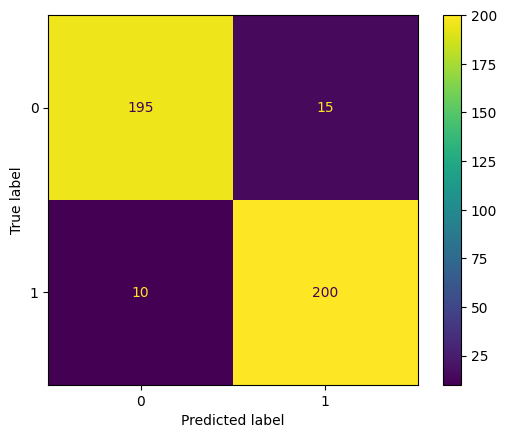

In [21]:
#display confusion metrix

cm = ConfusionMatrixDisplay.from_predictions(test_labels, rounded_predictions)
